11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


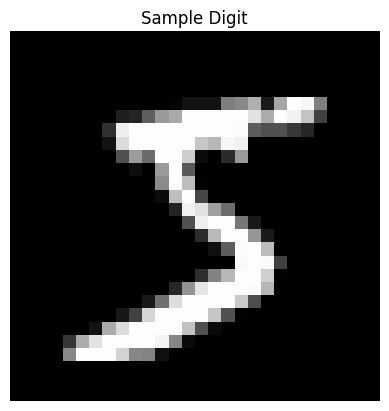

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9102 - loss: 0.2939 - val_accuracy: 0.9836 - val_loss: 0.0472
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9916 - val_loss: 0.0289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9936 - loss: 0.0194 - val_accuracy: 0.9902 - val_loss: 0.0302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9950 - loss: 0.0164 - val_accuracy: 0.9904 - val_loss: 0.0331
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9977 -

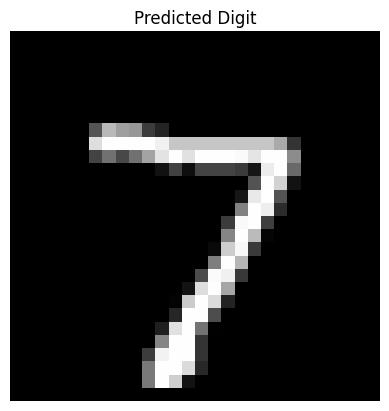

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Sample Digit")
plt.axis('off')
plt.show()
model = Sequential()

# Convolution layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolution layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# Second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
# Predict first test image
prediction = model.predict(X_test[0].reshape(1,28,28,1))

print("Predicted digit:", np.argmax(prediction))
print("Actual digit:", np.argmax(y_test[0]))

# Display the image
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title("Predicted Digit")
plt.axis('off')
plt.show()
model.save("handwritten_digit_cnn_model.h5")
